# Assignment 3
## Author: Emily McAfee
### Data Sources

In [1]:
# Import libraries
import pandas as pd
import datetime as dt
import numpy as np
from collections import OrderedDict

In [2]:
filename = "https://library.startlearninglabs.uw.edu/DATASCI420/2019/Datasets/SuperstoreTransaction.csv"
ssdf = pd.read_csv(filename)
ssdf.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
ssdf.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [4]:
# Convert timestamp to datetime object
ssdf["Order Date"] = pd.to_datetime(ssdf["Order Date"], format = '%m/%d/%Y')

In [5]:
# Check data
ssdf.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
ssdf.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date                object
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [7]:
print('Minimal date=%s, Maximal Date = %s' % (min(ssdf["Order Date"]), \
                                              max(ssdf["Order Date"])))

Minimal date=2014-01-03 00:00:00, Maximal Date = 2017-12-30 00:00:00


In [8]:
# Get rid of unecessary features
ssdf1 = ssdf.drop(['Row ID','Ship Date', 'Ship Mode', 'Customer Name', 'Segment', 'Country',
                'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category',
                'Sub-Category', 'Product Name'], axis = 1)
ssdf1.head()
#ssdf1.dtypes

,Order ID,Order Date,Customer ID,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,CG-12520,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,CG-12520,731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,DV-13045,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,SO-20335,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,SO-20335,22.3680,2,0.20,2.5164


## Calculate Recency, Frequency, Monetary for each customer

In [9]:
# Establish variables for recency
NOW = dt.datetime(2017, 12, 31)

In [10]:
# Create RFM table
rfmtable = ssdf1.groupby('Customer ID').agg({'Order Date': lambda x:
                                           (NOW - x.max()).days, 'Quantity':lambda x: len(x), 'Profit':
                                           lambda x: x.sum()})

# Create consistency in type/naming
rfmtable['Order Date'] = rfmtable['Order Date'].astype(int)
rfmtable.rename(columns = {'Order Date': 'recency',
                          'Quantity': 'frequency',
                          'Profit': 'monetary_value'},
               inplace = True)


In [11]:
# Check data
rfmtable

,recency,frequency,monetary_value
Customer ID,,,
AA-10315,185,11,-362.8825
AA-10375,20,15,277.3824
AA-10480,260,12,435.8274
AA-10645,56,18,857.8033
AB-10015,416,6,129.3465
...,...,...,...
XP-21865,44,28,621.2300
YC-21895,5,8,1305.6290
YS-21880,10,12,1778.2923


In [12]:
# Let's reduce the dataset to only work with customers 
# that have purchased something in the last 6 months
rfmt = rfmtable.loc[rfmtable.recency <= 180]
rfmt

,recency,frequency,monetary_value
Customer ID,,,
AA-10375,20,15,277.3824
AA-10645,56,18,857.8033
AB-10060,55,18,2054.5885
AB-10105,42,20,5444.8055
AB-10150,42,12,313.6597
...,...,...,...
WB-21850,21,37,714.3311
XP-21865,44,28,621.2300
YC-21895,5,8,1305.6290


In [13]:
# See how many negative profit margins there are
rfmtable = rfmt.copy()
sum(n < 0 for n in rfmtable.monetary_value.values.flatten())

107

In [14]:
# Remove negative profit margins from df
rfmtable1 = rfmtable.loc[rfmtable['monetary_value'] >= 0]
rfmtable1

,recency,frequency,monetary_value
Customer ID,,,
AA-10375,20,15,277.3824
AA-10645,56,18,857.8033
AB-10060,55,18,2054.5885
AB-10105,42,20,5444.8055
AB-10150,42,12,313.6597
...,...,...,...
VP-21730,31,5,205.3888
WB-21850,21,37,714.3311
XP-21865,44,28,621.2300


### 3. Using K-means algorithm, perform customer segmentation

In [15]:
# Create array x of data to be put into k-means algorithm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as mt


x = np.array(rfmtable1.loc[:,['recency', 'frequency', 'monetary_value']])

kmeans = KMeans(n_clusters = 3)
kmeans.fit(x)

print(kmeans.cluster_centers_)
print(kmeans.labels_)
len(kmeans.labels_)

[[  57.97468354   17.20253165 1521.01210633]
 [  58.2          13.8        5329.40186   ]
 [  60.74         12.8         315.45445075]]
[2 2 0 1 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2
 0 2 2 2 2 0 0 0 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0
 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 0 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 0 2 0 0 2 2 2 2 2
 2 2 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 1 0 2 2 0 0 2 0 2 2 2 2 2
 2 2 0 0 0 2 2 2 2 2 0 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2
 2 0 2 2 2 2 2 2 2 0 2 0 2 2 2 2 0 2 2 0 2 2 2 2 2 0 0 2 0 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 2 2 2 0 0 2 2 0 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 2 2 2 0 0 2 2 2 2 0 2 0 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 0 2 2 2 2 0 2 0 2 2 2 0 2 2 2 2 2 2 2 

484

In [19]:
# Add labels to dataframe
rfmtable2 = rfmtable1.copy()

rfmtable2['cluster'] = kmeans.labels_

zero = rfmtable2.loc[rfmtable2['cluster'] == 0]
one = rfmtable2.loc[rfmtable2['cluster'] == 1]
two = rfmtable2.loc[rfmtable2['cluster'] == 2]

In [17]:
# Check data
rfmtable2.head()

,recency,frequency,monetary_value,cluster
Customer ID,,,,
AA-10375,20,15,277.3824,2
AA-10645,56,18,857.8033,2
AB-10060,55,18,2054.5885,0
AB-10105,42,20,5444.8055,1
AB-10150,42,12,313.6597,2


In [20]:
zero.head()

,recency,frequency,monetary_value,cluster
Customer ID,,,,
AB-10060,55,18,2054.5885,0
AC-10450,12,9,1366.0098,0
AD-10180,30,12,1869.9294,0
AH-10210,7,13,1308.5546,0
AJ-10795,167,21,1158.7064,0


In [21]:
one.head()

,recency,frequency,monetary_value,cluster
Customer ID,,,,
AB-10105,42,20,5444.8055,1
CM-12385,38,10,3899.8904,1
HL-15040,44,11,5622.4292,1
RB-19360,97,18,6976.0959,1
TA-21385,70,10,4703.7883,1


In [22]:
two.head()

,recency,frequency,monetary_value,cluster
Customer ID,,,,
AA-10375,20,15,277.3824,2
AA-10645,56,18,857.8033,2
AB-10150,42,12,313.6597,2
AB-10165,26,14,220.8130,2
AB-10255,167,14,264.5675,2


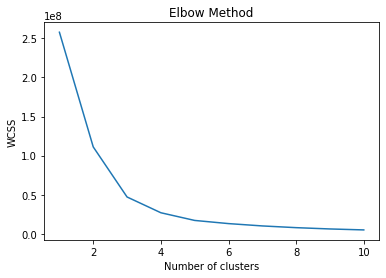

In [23]:
# Check if our clusters were a good choice
x2 = np.array(rfmtable2.loc[:,['recency', 'frequency', 'monetary_value']])


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Describe your results
Customer segmentation can provide a wealth of business insight. By grouping our customers into segments based on various characteristics, we can tailor marketing, advertising, and products that most aptly fit the customer, likely resulting in increased customer retention and a variety of other positive business prospects. In this analysis we have successfully clustered our customers into three groups. We did this by first calculating the recency, frequency, and monetary gain from each customer. By clustering based on these important characteristics of a customer, we were able to find the most optimal number of clusters that was also demonstrated in our visual (i.e. elbow plot). By examining these groups of customers individually we can see that cluster 1 is a group that tends to yield high profit for the company, with cluster 2 yielding the lowest profit. While Cluster 0 may need the most immediate attenntion from the marketing team, Cluster 2 may alsoo be an interesting group to further investigate. For example, we saw in the original dataset that 'discounts' was indeed a variable. For this analysis we excluded any 'negative profit' (i.e. losses) from the k-means algorithm, but that may also be another avenue to explore (i.e. is the company giving away too many coupons to too many customers?). With the information we have here we can provide the marketing and customer success teams with lists of people that may not be buying very many products from us within the past six months and address it before we lose them as a customer for good.